In [55]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


In [56]:
plt.style.use('fivethirtyeight')

In [57]:
APIKey =  'lbcG3nJvvxmkNSVyCF2pkbbha'
APIKeySecret = '3KqLrCSAtV6sWg3k4iCVjvQy9PfXL4l7b3xAtUUyntq3sz4NB2'
AccessToken = '1514901342418259974-UV83jJk37A6dqg6WytG5deD3liyd1v'
AccessTokenSecret = '9wkaLooEuVyOz0MIkuL7feaA1pAGw2GeBxLTqYDPDsmvT'

In [58]:
authenticate = tweepy.OAuthHandler(APIKey, APIKeySecret)

authenticate.set_access_token(AccessToken, AccessTokenSecret)

api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [59]:
# Extract 100 tweets from twitter user
posts = api.user_timeline(screen_name = "BillGates", count = 100, tweet_mode = "extended")
i = 1
print("Show the 5 recent tweets: \n")
for tweet in posts[0:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i = i+1

Show the 5 recent tweets: 

1) Preventing the next pandemic is not cheap, but it'll save lives and money in the long run. The IMF estimates that COVID will cost nearly $14 trillion. We can save trillions by spending billions. https://t.co/uaIhdLHD4u

2) This week, I got to do what every nerd dreams of – talk about ideas and learn from others doing big things. I believe that with good ideas and collaboration, we can make COVID the last pandemic. 
 
Plus, it’s not every day you can say thanks for coming to my TED Talk. https://t.co/1qAx64z334

3) By May of 2021, more than 115,000 frontline workers died taking care of COVID patients. At #TED2022, we discussed lessons learned that will help us be smarter next time, and not repeat the past. https://t.co/Ef3jLHIrrw

4) RT @BlessingOmakwu: To make COVID-19 #TheLastPandemic, We need investments in:
✔️ Disease Monitoring 
✔️ Research &amp; Development 
✔️ Health…

5) I'm excited to take the stage at #TED2022 and share a plan to make COVID-19 th

In [60]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,"Preventing the next pandemic is not cheap, but..."
1,"This week, I got to do what every nerd dreams ..."
2,"By May of 2021, more than 115,000 frontline wo..."
3,RT @BlessingOmakwu: To make COVID-19 #TheLastP...
4,I'm excited to take the stage at #TED2022 and ...


In [61]:
#Clean tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    
    return text

df['Tweets']=df['Tweets'].apply(cleanTxt)

df

,Tweets
0,"Preventing the next pandemic is not cheap, but..."
1,"This week, I got to do what every nerd dreams ..."
2,"By May of 2021, more than 115,000 frontline wo..."
3,": To make COVID-19 TheLastPandemic, We need in..."
4,I'm excited to take the stage at TED2022 and s...
...,...
95,Mamello Makhele is a hero from Lesotho who tra...
96,I know it’s frustrating to go into another hol...
97,"If there’s good news here, it’s that omicron m..."
98,There will be more breakthrough cases in peopl...


In [97]:
#Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity,Analysis
0,"Preventing the next pandemic is not cheap, but...",0.375000,-0.037500,Neutral
1,"This week, I got to do what every nerd dreams ...",0.241667,0.225000,Positive
2,"By May of 2021, more than 115,000 frontline wo...",0.250000,0.083333,Neutral
3,": To make COVID-19 TheLastPandemic, We need in...",0.000000,0.000000,Neutral
4,I'm excited to take the stage at TED2022 and s...,0.408333,0.187500,Positive
...,...,...,...,...
95,Mamello Makhele is a hero from Lesotho who tra...,0.650000,0.250000,Positive
96,I know it’s frustrating to go into another hol...,0.591667,-0.008333,Neutral
97,"If there’s good news here, it’s that omicron m...",0.362245,0.036054,Neutral
98,There will be more breakthrough cases in peopl...,0.620000,0.182857,Positive


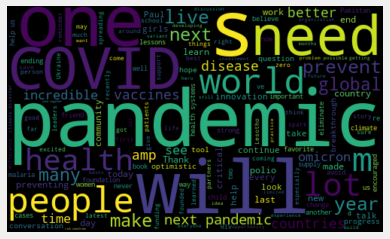

In [63]:
# Plot The Word Cloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
worldCloud = WordCloud(width=500, height=300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(worldCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [99]:
#negative, neutral, positive analysis
def getAnalysis(score):
    if score < -0.2:
        return 'Negative'
    elif score -0.2<-0.01<0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

    

In [87]:
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j=j+1

1) This week, I got to do what every nerd dreams of – talk about ideas and learn from others doing big things. I believe that with good ideas and collaboration, we can make COVID the last pandemic. 
 
Plus, it’s not every day you can say thanks for coming to my TED Talk. 

2) By May of 2021, more than 115,000 frontline workers died taking care of COVID patients. At TED2022, we discussed lessons learned that will help us be smarter next time, and not repeat the past. 

3) I'm excited to take the stage at TED2022 and share a plan to make COVID-19 the last pandemic. 

4) I recently had a chance to check out some of the latest devices and experiences in augmented reality. It was a lot of fun to see how far the hardware has come. 

5) : Ever wonder whether foundation partners give honest feedback to leaders like ?  

Watch our newest episod…

6) Solving for Zero is an excellent overview of the complex challenge of climate change and an inspiring look at some of the most promising solutions.

In [100]:
#print negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j)+') '+sortedDF['Tweets'][i])
        print()
        j=j+1

1) The omicron surge is an unfortunate reminder that the only way to eliminate the threat of COVID-19 somewhere is to eliminate it everywhere. That’s why  is joining  to renew our investment in . 

2) :     So tough question: where do you think SARS-CoV-2 came from? What data do you want to see? An…

3)  mRna vaccines still can't meet all the demand so figuring out who gets what is complicated.



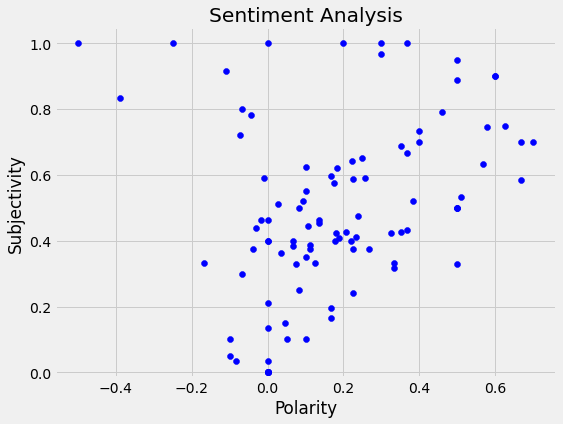

In [102]:
plt.figure(figsize = (8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [76]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)


0.0

In [69]:

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0]/df.shape[0])*100,1)


5.0

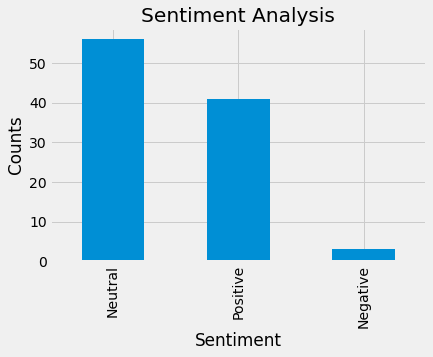

In [101]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()